# Estimación del Precio de Venta en Vehículos de Ocasión 🚗

En este notebook se desarrolla un modelo de red neuronal para predecir el precio de venta de vehículos usados a partir de 7 variables independientes. Se incluyen pasos de:
- **Carga y exploración del dataset**
- **Limpieza y preprocesamiento de datos**
- **Ingeniería de características**
- **División en conjuntos de entrenamiento y prueba**
- **Construcción, entrenamiento y evaluación de la red neuronal**

El dataset se asume en un archivo `true_car_listings.csv` con las siguientes columnas:
- **Price**: Variable objetivo.
- **Year**: Año en que se compró el vehículo.
- **Mileage**: Número de kilómetros recorridos.
- **City**: Ciudad en la que se vendió.
- **State**: Estado en el que se vendió.
- **Vin**: Identificador único del vehículo.
- **Make**: Fabricante.
- **Model**: Modelo del vehículo.

#### 📚 Importacion de librerias

In [6]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import setuptools.dist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Configuración de Matplotlib para gráficos en línea
%matplotlib inline

## 1. Carga y Exploración del Dataset

En este paso se carga el archivo CSV y se exploran las primeras filas y la estructura del dataset para entender mejor los datos con los que trabajaremos.

In [7]:
# Cargamos el dataset
df = pd.read_csv('true_car_listings.csv')
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

Primeras filas del dataset:
   Price  Year  Mileage              City State                Vin   Make  \
0   8995  2014    35725           El Paso    TX  19VDE2E53EE000083  Acura   
1  10888  2013    19606  Long Island City    NY  19VDE1F52DE012636  Acura   
2   8995  2013    48851           El Paso    TX  19VDE2E52DE000025  Acura   
3  10999  2014    39922           Windsor    CO  19VDE1F71EE003817  Acura   
4  14799  2016    22142            Lindon    UT  19UDE2F32GA001284  Acura   

          Model  
0    ILX6-Speed  
1    ILX5-Speed  
2    ILX6-Speed  
3    ILX5-Speed  
4  ILXAutomatic  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object

## 2. Limpieza y Preprocesamiento de los Datos

### 2.1 Eliminación de Columnas Innecesarias
Eliminamos la columna `Vin` ya que es un identificador único que no aporta información para la predicción.

### 2.2 Gestión de Valores Nulos
Verificamos si existen valores nulos en el dataset y, en este ejemplo, optamos por eliminar las filas que los contengan.

### 2.3 Ingeniería de Características: One-Hot Encoding
Convertimos las variables categóricas (`City`, `State`, `Make` y `Model`) en variables dummy para poder trabajar con ellas en la red neuronal.

### 2.4 Escalado de Variables Numéricas
Las variables numéricas `Year` y `Mileage` se escalan utilizando `StandardScaler` para facilitar el entrenamiento.

In [12]:
# 2.1 Eliminación de la columna 'Vin'
print(df.head())
# df = df.drop('Vin', axis=1)

# 2.2 Gestión de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminamos las filas con valores nulos
df = df.dropna()

# 2.3 Label Encoding para las variables categóricas
categorical_cols = ['City', 'State', 'Make', 'Model']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nDimensiones del dataset tras el one-hot encoding:", df.shape)

# Revisamos algunas filas para confirmar el cambio
print("\nDatos después del Label Encoding:")
print(df.head())

# # 2.4 Separación de la variable objetivo y las independientes
# X = df_encoded.drop('Price', axis=1)
# y = df_encoded['Price']

# Separación de la variable objetivo y las independientes
X = df.drop('Price', axis=1)
y = df['Price']

# Escalado de las variables numéricas 'Year' y 'Mileage'
scaler = StandardScaler()
X[['Year', 'Mileage']] = scaler.fit_transform(X[['Year', 'Mileage']])

   Price  Year  Mileage  City  State  Make  Model
0   8995  2014    35725   646     49     1   1194
1  10888  2013    19606  1260     39     1   1193
2   8995  2013    48851   646     49     1   1194
3  10999  2014    39922  2490      6     1   1193
4  14799  2016    22142  1231     50     1   1196

Valores nulos por columna:
Price      0
Year       0
Mileage    0
City       0
State      0
Make       0
Model      0
dtype: int64

Dimensiones del dataset tras el one-hot encoding: (852122, 7)

Datos después del Label Encoding:
   Price  Year  Mileage  City  State  Make  Model
0   8995  2014    35725   646     49     1   1194
1  10888  2013    19606  1260     39     1   1193
2   8995  2013    48851   646     49     1   1194
3  10999  2014    39922  2490      6     1   1193
4  14799  2016    22142  1231     50     1   1196


## 3. División del Dataset en Conjuntos de Entrenamiento y Prueba

Separamos los datos en un 80% para entrenamiento y un 20% para prueba. Esto nos permitirá evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (681697, 6)
Tamaño del conjunto de prueba: (170425, 6)


## 4. Construcción y Compilación del Modelo de Red Neuronal

Se crea un modelo secuencial con dos capas ocultas (64 neuronas cada una) y una capa de salida para regresión (una única neurona). Se compila el modelo utilizando el optimizador Adam, la función de pérdida MSE (error cuadrático medio) y se monitoriza el MAE (error absoluto medio).

In [17]:
# Creación del modelo
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  # Capa de salida para regresión
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumen de la arquitectura del modelo
print("\nResumen del modelo:")
model.summary()


Resumen del modelo:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                112       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Entrenamiento del Modelo

Entrenamos el modelo durante 100 epochs utilizando un 20% del conjunto de entrenamiento como validación. Esto nos permitirá observar la evolución de la pérdida y del MAE tanto en entrenamiento como en validación.

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)

Epoch 1/50
17043/17043 [==============================] - 32s 2ms/step - loss: 202682912.0000 - mae: 9463.0127 - val_loss: 175844304.0000 - val_mae: 8220.5010
Epoch 2/50
17043/17043 [==============================] - 30s 2ms/step - loss: 152994496.0000 - mae: 7834.8140 - val_loss: 157509456.0000 - val_mae: 7687.1899
Epoch 3/50
17043/17043 [==============================] - 30s 2ms/step - loss: 145534672.0000 - mae: 7609.3960 - val_loss: 153999984.0000 - val_mae: 7521.9741
Epoch 4/50
17043/17043 [==============================] - 30s 2ms/step - loss: 142975424.0000 - mae: 7514.7310 - val_loss: 152439376.0000 - val_mae: 7481.8115
Epoch 5/50
17043/17043 [==============================] - 31s 2ms/step - loss: 141123536.0000 - mae: 7444.0884 - val_loss: 150055024.0000 - val_mae: 7431.4170
Epoch 6/50
17043/17043 [==============================] - 30s 2ms/step - loss: 139465792.0000 - mae: 7380.7905 - val_loss: 150067232.0000 - val_mae: 7551.3911
Epoch 7/50
17043/17043 [======================

## 6. Visualización de Resultados del Entrenamiento

A continuación se muestran las gráficas que indican la evolución de la pérdida (MSE) y del MAE durante el entrenamiento y la validación.

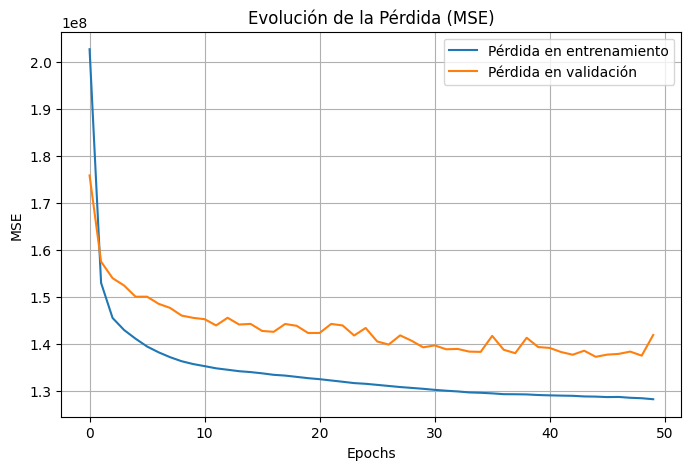

In [19]:
# 6.1 Gráfica de la pérdida (MSE)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Evolución de la Pérdida (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 6.2 Gráfica del MAE
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='MAE en entrenamiento')
plt.plot(history.history['val_mae'], label='MAE en validación')
plt.title('Evolución del MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

## 7. Evaluación del Modelo en el Conjunto de Prueba

Se evalúa el modelo utilizando el conjunto de prueba para obtener métricas finales (MSE y MAE) que permitan conocer el desempeño del modelo en datos no vistos.

In [20]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print("\nEvaluación en el conjunto de prueba:")
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

5326/5326 [==============================] - 6s 1ms/step - loss: 133377008.0000 - mae: 6840.3198

Evaluación en el conjunto de prueba:
Test Loss (MSE): 133377008.0
Test MAE: 6840.31982421875


## 8. Visualización de las Predicciones vs. los Valores Reales

Se realiza un scatter plot comparando los precios reales con los precios predichos por el modelo. Además, se dibuja la línea de identidad para facilitar la comparación.

5326/5326 [==============================] - 5s 979us/step


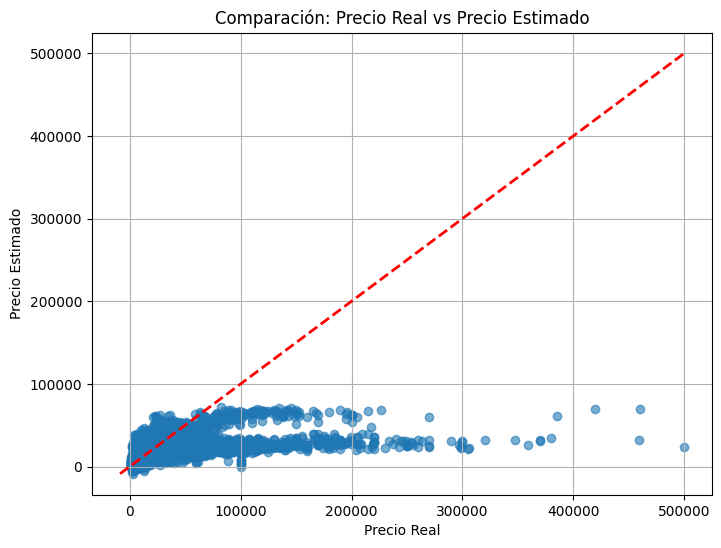

In [21]:
# Predicción de precios para el conjunto de prueba
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Precio Real')
plt.ylabel('Precio Estimado')
plt.title('Comparación: Precio Real vs Precio Estimado')

# Línea de identidad: donde la predicción es igual al valor real
limites = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(limites, limites, 'r--', lw=2)
plt.grid(True)
plt.show()

## Conclusiones

En este notebook se ha demostrado cómo construir y entrenar un modelo de red neuronal para estimar el precio de vehículos usados. Se han realizado las siguientes tareas:
- **Preprocesamiento de los datos**: limpieza, transformación de variables categóricas y escalado.
- **División en conjuntos de entrenamiento y prueba**.
- **Construcción de un modelo de red neuronal** utilizando Keras.
- **Entrenamiento y visualización de la evolución de las métricas**.
- **Evaluación del modelo** y comparación entre los valores reales y predichos.

Este ejemplo puede ser la base para realizar mejoras adicionales en la arquitectura del modelo, el preprocesamiento de datos o incluso probar otras técnicas de ingeniería de características para mejorar la precisión del modelo.